In [117]:
import pandas as pd
import numpy as np
import pylab as pl

In this EDA, we want to look into the different data captured and analyze what are some possible ways to identify whether that data was collected while a user was 

In [118]:
#internet browsing data collection with VPN
int1 = pd.read_csv('Week4-datafiles/intvpn.csv')
int2 = pd.read_csv('Week4-datafiles/int2vpn.csv')
int3 = pd.read_csv('Week4-datafiles/int3vpn.csv')

In [119]:
#video streaming data collection with VPN
vid1 = pd.read_csv('Week4-datafiles/testcsv1.csv')
vid2 = pd.read_csv('Week4-datafiles/testcsv2.csv')
vid3 = pd.read_csv('Week4-datafiles/testcsv3.csv')

In [120]:
int1.head()

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs
0,1604972784,100.112.95.158,61917,100.113.29.201,8009,6,214,162,2,1,1604972784155;1604972784159;1604972784159;,162;162;52;,1;2;1;
1,1604972784,100.112.95.158,61934,100.112.254.17,8009,6,214,162,2,1,1604972784192;1604972784197;1604972784198;,162;162;52;,1;2;1;
2,1604972784,100.112.95.158,61916,100.112.223.112,8009,6,376,278,3,3,1604972784309;1604972784384;1604972784400;1604...,162;162;52;64;162;52;,1;1;2;2;2;1;
3,1604972784,100.112.95.158,63574,140.82.114.25,443,6,134,130,2,2,1604972784338;1604972784338;1604972784339;1604...,78;52;82;52;,2;1;1;2;
4,1604972784,100.112.95.158,50671,172.217.5.78,443,17,1667,692,3,3,1604972784409;1604972784409;1604972784415;1604...,1378;228;54;562;76;61;,1;1;2;2;2;1;


In the extended version of network_stats that was provided to us by viasat, we can see there are a couple extra rows of data. These rows include ["packet_times", "packet_sizes", "packet_dirs"]

In [121]:
int1[["Time", "packet_sizes", "packet_dirs"]]

,Time,packet_sizes,packet_dirs
0,1604972784,162;162;52;,1;2;1;
1,1604972784,162;162;52;,1;2;1;
2,1604972784,162;162;52;64;162;52;,1;1;2;2;2;1;
3,1604972784,78;52;82;52;,2;1;1;2;
4,1604972784,1378;228;54;562;76;61;,1;1;2;2;2;1;
...,...,...,...
3338,1604973434,40;40;,1;2;
3339,1604973434,162;162;52;,1;2;1;
3340,1604973434,40;40;,1;2;
3341,1604973434,40;40;,1;2;


Below we are data scraping the last two columns in order to analyze and look at the two types of network movements/flows (1-2,2-1)

In [122]:
#we are separating the column "packet sizes"
int1_new_pksize = []
for i in int1["packet_sizes"]:
    arr = i.split(";")
    for j in arr[:-1]:
        int1_new_pksize.append(j)
        
int2_new_pksize = []
for i in int2["packet_sizes"]:
    arr = i.split(";")
    for j in arr[:-1]:
        int2_new_pksize.append(j)
        
        
int3_new_pksize = []
for i in int3["packet_sizes"]:
    arr = i.split(";")
    for j in arr[:-1]:
        int3_new_pksize.append(j)


In [123]:
#we are separating the column "packet sizes"
vid1_new_pksize = []
for i in vid1["packet_sizes"]:
    arr = i.split(";")
    for j in arr[:-1]:
        vid1_new_pksize.append(j)
        
vid2_new_pksize = []
for i in vid2["packet_sizes"]:
    arr = i.split(";")
    for j in arr[:-1]:
        vid2_new_pksize.append(j)
        
        
vid3_new_pksize = []
for i in vid3["packet_sizes"]:
    arr = i.split(";")
    for j in arr[:-1]:
        vid3_new_pksize.append(j)


In [124]:
#we are separating the column "packet dir"
int1_new_pkdir = []
for i in int1["packet_dirs"]:
    arr = i.split(";")
    for j in arr[:-1]:
        int1_new_pkdir.append(j)
        
int2_new_pkdir = []
for i in int2["packet_dirs"]:
    arr = i.split(";")
    for j in arr[:-1]:
        int2_new_pkdir.append(j)
        
int3_new_pkdir = []
for i in int3["packet_dirs"]:
    arr = i.split(";")
    for j in arr[:-1]:
        int3_new_pkdir.append(j)

In [125]:
#we are separating the column "packet dir"
vid1_new_pkdir = []
for i in vid1["packet_dirs"]:
    arr = i.split(";")
    for j in arr[:-1]:
        vid1_new_pkdir.append(j)
        
vid2_new_pkdir = []
for i in vid2["packet_dirs"]:
    arr = i.split(";")
    for j in arr[:-1]:
        vid2_new_pkdir.append(j)
        
vid3_new_pkdir = []
for i in vid3["packet_dirs"]:
    arr = i.split(";")
    for j in arr[:-1]:
        vid3_new_pkdir.append(j)

We are now separating every packet size to an individual row. This allows us to see and analyze every packet and its direction as individuals.

In [126]:
#modified internet browsing data with VPN
mod_int1 = pd.DataFrame({'packet_sizes': pd.to_numeric(int1_new_pksize), 'packet_dir': pd.to_numeric(int1_new_pkdir)})
mod_int2 = pd.DataFrame({'packet_sizes': pd.to_numeric(int2_new_pksize), 'packet_dir': pd.to_numeric(int2_new_pkdir)})
mod_int3 = pd.DataFrame({'packet_sizes': pd.to_numeric(int3_new_pksize), 'packet_dir': pd.to_numeric(int3_new_pkdir)})

In [127]:
#modified video streaming data with VPN
mod_vid1 = pd.DataFrame({'packet_sizes': pd.to_numeric(vid1_new_pksize), 'packet_dir': pd.to_numeric(vid1_new_pkdir)})
mod_vid2 = pd.DataFrame({'packet_sizes': pd.to_numeric(vid2_new_pksize), 'packet_dir': pd.to_numeric(vid2_new_pkdir)})
mod_vid3 = pd.DataFrame({'packet_sizes': pd.to_numeric(vid3_new_pksize), 'packet_dir': pd.to_numeric(vid3_new_pkdir)})

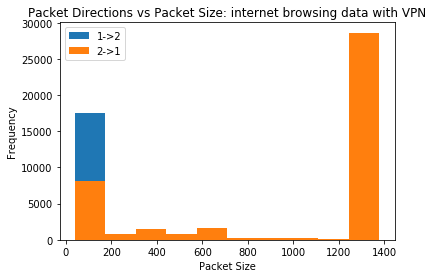

In [128]:
mod_int1[mod_int1["packet_dir"] == 1]["packet_sizes"].plot(kind = "hist")
mod_int1[mod_int1["packet_dir"] == 2]["packet_sizes"].plot(kind = "hist")
pl.title('Packet Directions vs Packet Size: internet browsing data with VPN')
pl.xlabel('Packet Size')
pl.ylabel('Frequency')
pl.legend(["1->2", "2->1"])


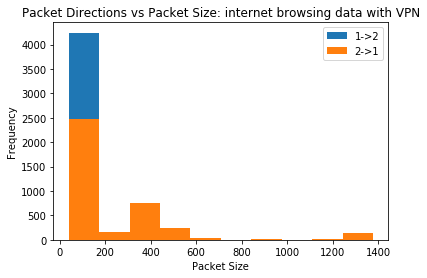

In [129]:
mod_int2[mod_int2["packet_dir"] == 1]["packet_sizes"].plot(kind = "hist")
mod_int2[mod_int2["packet_dir"] == 2]["packet_sizes"].plot(kind = "hist")
pl.title('Packet Directions vs Packet Size: internet browsing data with VPN')
pl.xlabel('Packet Size')
pl.ylabel('Frequency')
pl.legend(["1->2", "2->1"])

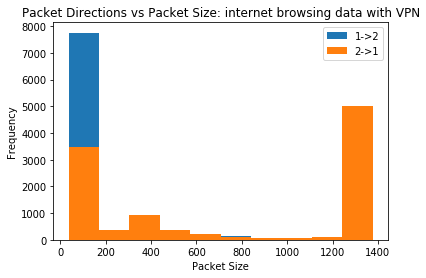

In [130]:
mod_int3[mod_int3["packet_dir"] == 1]["packet_sizes"].plot(kind = "hist")
mod_int3[mod_int3["packet_dir"] == 2]["packet_sizes"].plot(kind = "hist")
pl.title('Packet Directions vs Packet Size: internet browsing data with VPN')
pl.xlabel('Packet Size')
pl.ylabel('Frequency')
pl.legend(["1->2", "2->1"])

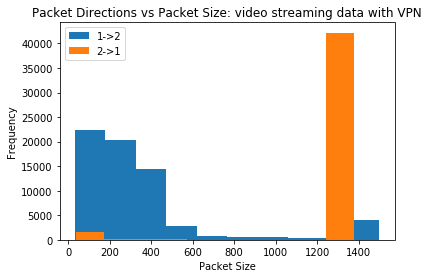

In [131]:
mod_vid1[mod_vid1["packet_dir"] == 1]["packet_sizes"].plot(kind = "hist")
mod_vid1[mod_vid1["packet_dir"] == 2]["packet_sizes"].plot(kind = "hist")
pl.title('Packet Directions vs Packet Size: video streaming data with VPN')
pl.xlabel('Packet Size')
pl.ylabel('Frequency')
pl.legend(["1->2", "2->1"])

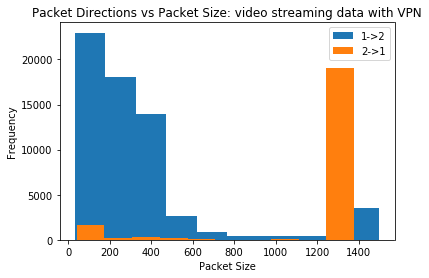

In [132]:
mod_vid2[mod_vid2["packet_dir"] == 1]["packet_sizes"].plot(kind = "hist")
mod_vid2[mod_vid2["packet_dir"] == 2]["packet_sizes"].plot(kind = "hist")
pl.title('Packet Directions vs Packet Size: video streaming data with VPN')
pl.xlabel('Packet Size')
pl.ylabel('Frequency')
pl.legend(["1->2", "2->1"])

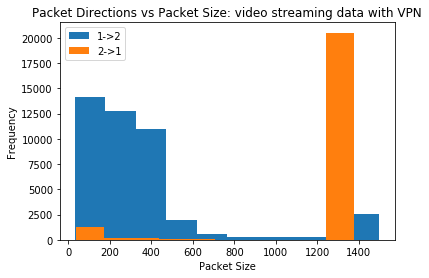

In [133]:
mod_vid3[mod_vid3["packet_dir"] == 1]["packet_sizes"].plot(kind = "hist")
mod_vid3[mod_vid3["packet_dir"] == 2]["packet_sizes"].plot(kind = "hist")
pl.title('Packet Directions vs Packet Size: video streaming data with VPN')
pl.xlabel('Packet Size')
pl.ylabel('Frequency')
pl.legend(["1->2", "2->1"])

Here we are continuing to look at perform EDA by looking at mean, STD, max, min values of the datasets

In [134]:
mod_int1.describe()

,packet_sizes,packet_dir
count,63092.000000,63092.000000
mean,703.462246,1.670196
std,580.157708,0.470146
min,40.000000,1.000000
25%,66.000000,1.000000
50%,576.000000,2.000000
75%,1280.000000,2.000000
max,1378.000000,2.000000


In [135]:
mod_int2.describe()

,packet_sizes,packet_dir
count,8690.000000,8690.000000
mean,199.798734,1.441772
std,231.573326,0.496627
min,40.000000,1.000000
25%,108.000000,1.000000
50%,126.000000,1.000000
75%,162.000000,2.000000
max,1378.000000,2.000000


In [136]:
mod_int3.describe()

,packet_sizes,packet_dir
count,20288.000000,20288.000000
mean,491.443119,1.527455
std,540.806680,0.499258
min,36.000000,1.000000
25%,52.000000,1.000000
50%,130.000000,2.000000
75%,1290.000000,2.000000
max,1378.000000,2.000000


In [137]:
mod_vid1.describe()

,packet_sizes,packet_dir
count,111324.000000,111324.000000
mean,730.253198,1.400758
std,573.696272,0.490054
min,32.000000,1.000000
25%,199.000000,1.000000
50%,440.000000,1.000000
75%,1378.000000,2.000000
max,1500.000000,2.000000


In [138]:
mod_vid2.describe()

,packet_sizes,packet_dir
count,85233.000000,85233.00000
mean,559.304565,1.25354
std,528.442907,0.43504
min,32.000000,1.00000
25%,151.000000,1.00000
50%,319.000000,1.00000
75%,1378.000000,2.00000
max,1500.000000,2.00000


In [139]:
mod_vid3.describe()

,packet_sizes,packet_dir
count,66519.000000,66519.000000
mean,657.164930,1.337287
std,555.963748,0.472787
min,32.000000,1.000000
25%,192.000000,1.000000
50%,410.000000,1.000000
75%,1378.000000,2.000000
max,1500.000000,2.000000


## Feature Engineering

Feature #1: Binary Mean 

1. take into account the mean of the packet sizes for the data set (binary column)

0 = if mean of packet_sizes is < 500 (found from datasets of video streaming and internet browsing on vpn)

1 = if mean of packet_sizes is > 500

the idea here is that is a lot of packet sizes are larger than 500, it is video streaming. 


This function returns a new column (series) of binary (0/1) data 
**make sure parameter data is modified and split (one packet size per row)

In [140]:
def binarymean_packetsizes(modified_data):
    return (modified_data["packet_sizes"] > 500).replace({True: 1, False: 0})

Feature #2: Binary Min

When looking at the min/max of the packet_sizes for the activity, I noticed that the min value of packet_sizes was always 32 for video streaming. VS for internet browsing, it never got under 36. For that reason I want to see if this feature adds some accuracy to the model. 

0 = greater than 32

1 = 32 or less

In [141]:
def binarymin_packetsizes(modified_data):
    return (modified_data["packet_sizes"].min() <= 32)

In [142]:
!export PATH=/Library/TeX/texbin:$PATH

In [145]:
jupyter nbconvert your_notebook.ipynb --to pdf

SyntaxError: invalid syntax (<ipython-input-145-34652316e6e6>, line 1)

In [144]:
import nbconvert